# Wine Tasting with ML
<img style="float:left; max-height:250px" src="Wine.png">

### Import Packages

In [1]:
######## Install packages
#!pip install dtreeviz

######## Other libraries
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

# from sklearn.metrics import mean_absolute_error, log_loss, f1_score, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
# from sklearn import tree
# from string import ascii_letters
#import graphviz

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

from matplotlib import pyplot as plt
import dtreeviz
import seaborn as sns

### Prepare Dataset

In [3]:
WINE_SCORE_LIMIT = 6
wine=pd.read_csv('winequality-red.csv', sep=';')
wine['quality'] = np.where(wine['quality']>=WINE_SCORE_LIMIT , 1,0) # 1 stands for decent wine,0 - cooking wine

Drop_cols=['volatile acidity','free sulfur dioxide','pH','sulphates','density']
wine=wine.drop(Drop_cols, axis=1)

wine=wine.rename(columns={"fixed acidity": "Sourness", "citric acid": "Fruitiness",
                          "residual sugar":"Sweetness","chlorides":"Saltiness","total sulfur dioxide":"Preservatives",
                         "alcohol":"Alcohol%","quality":"Quality"})
wine.to_csv('winequality-red-simp.csv', sep = ';', index = False)


### Sample Data and Feature Stats

In [4]:
wine.head(5)

Sourness  Fruitiness  Sweetness  Saltiness  Preservatives  Alcohol%  \
0       7.4        0.00        1.9      0.076           34.0       9.4   
1       7.8        0.00        2.6      0.098           67.0       9.8   
2       7.8        0.04        2.3      0.092           54.0       9.8   
3      11.2        0.56        1.9      0.075           60.0       9.8   
4       7.4        0.00        1.9      0.076           34.0       9.4   

   Quality  
0        0  
1        0  
2        0  
3        1  
4        0

In [5]:
wine.describe()

Sourness   Fruitiness    Sweetness    Saltiness  Preservatives  \
count  1599.000000  1599.000000  1599.000000  1599.000000    1599.000000   
mean      8.319637     0.270976     2.538806     0.087467      46.467792   
std       1.741096     0.194801     1.409928     0.047065      32.895324   
min       4.600000     0.000000     0.900000     0.012000       6.000000   
25%       7.100000     0.090000     1.900000     0.070000      22.000000   
50%       7.900000     0.260000     2.200000     0.079000      38.000000   
75%       9.200000     0.420000     2.600000     0.090000      62.000000   
max      15.900000     1.000000    15.500000     0.611000     289.000000   

          Alcohol%      Quality  
count  1599.000000  1599.000000  
mean     10.422983     0.534709  
std       1.065668     0.498950  
min       8.400000     0.000000  
25%       9.500000     0.000000  
50%      10.200000     1.000000  
75%      11.100000     1.000000  
max      14.900000     1.000000

### Start thinking about drivers/features

##### Hypotheses
<font color='blue'> Start picking `top features` and `rank` them  </font>

### Correlation matrix


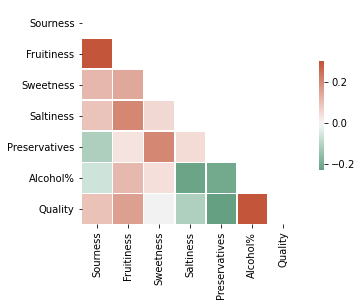

In [6]:
# Compute the correlation matrix
corr = wine.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(145, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
wine.head()

Sourness  Fruitiness  Sweetness  Saltiness  Preservatives  Alcohol%  \
0       7.4        0.00        1.9      0.076           34.0       9.4   
1       7.8        0.00        2.6      0.098           67.0       9.8   
2       7.8        0.04        2.3      0.092           54.0       9.8   
3      11.2        0.56        1.9      0.075           60.0       9.8   
4       7.4        0.00        1.9      0.076           34.0       9.4   

   Quality  
0        0  
1        0  
2        0  
3        1  
4        0

## Model Build

### Model 1 - Single Feature, Small Tree

In [8]:
## Set random seed
rand_seed=123

In [9]:
## Select Features
y=wine['Quality']
features=[
    'Sourness',
    'Fruitiness',
    'Sweetness',
    # 'Saltiness',
    # 'Preservatives',
    # 'Alcohol%'
]
x=wine[features]

## Split data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = rand_seed)

## Train and fit model
winemodel1 = DecisionTreeClassifier(random_state=rand_seed, max_depth=5)
winemodel1.fit(train_x, train_y)
val_predictions1=winemodel1.predict(val_x)

model1_acc=round(accuracy_score(val_y, val_predictions1)*100,2)
model1_f1=round(f1_score(val_y, val_predictions1)*100,2)

print('Model 1 Accuracy=',model1_acc,'%')

Model 1 Accuracy= 65.5 %


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/michaeca/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


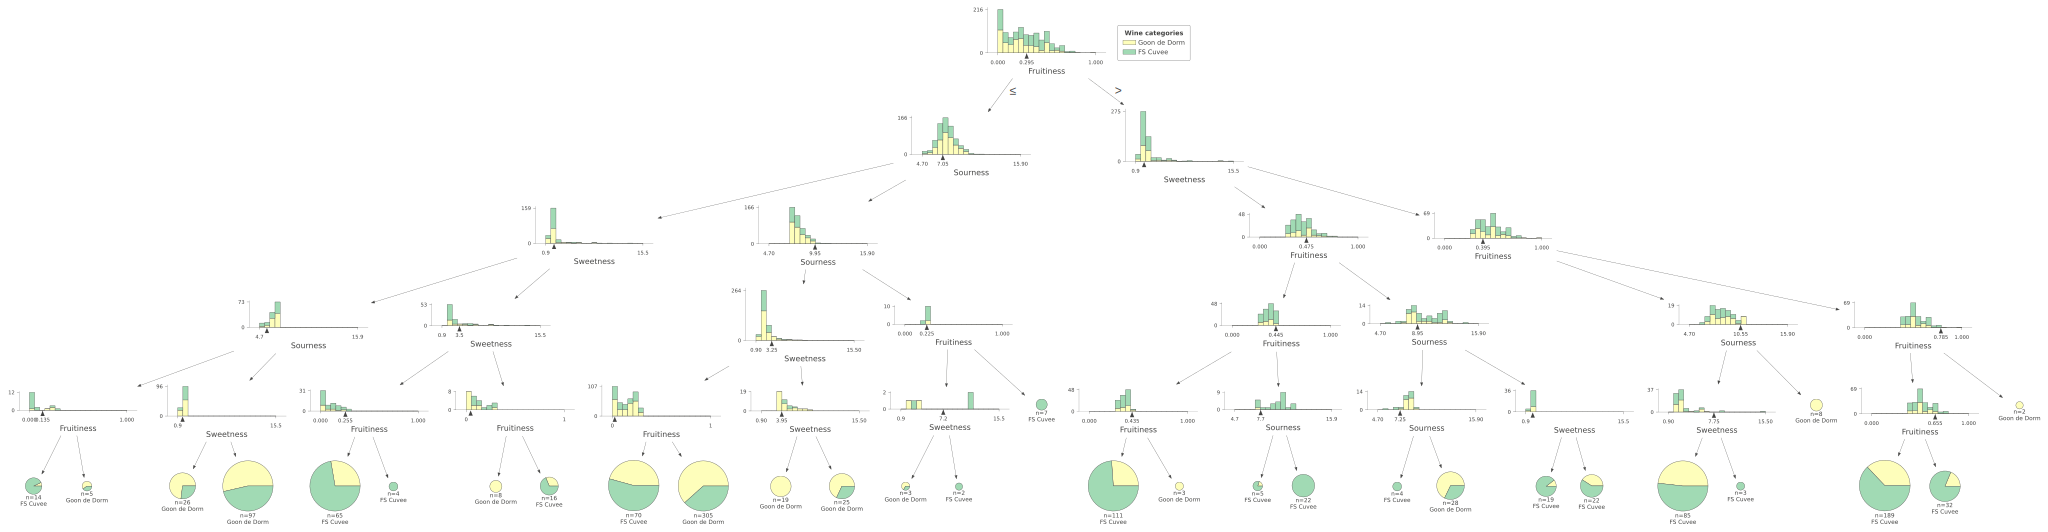

In [10]:
viz = dtreeviz.model(winemodel1,
            train_x,
            train_y,
            feature_names = train_x.columns,
            target_name = 'Wine categories',
            class_names = ['Goon de Dorm', 'FS Cuvee'])
viz.view()

### Model 2 - Selected Features; Bigger Tree

In [11]:
## Select Features
y=wine['Quality']
features=[
    # 'Sourness',
    # 'Fruitiness',
     'Sweetness',
    # 'Saltiness',
    'Preservatives',
     'Alcohol%'
]
x=wine[features]

## Split data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = rand_seed)

## Train and fit model
winemodel2 = DecisionTreeClassifier(random_state=rand_seed, max_depth=5)
winemodel2.fit(train_x, train_y)
val_predictions2=winemodel2.predict(val_x)

model2_acc=round(accuracy_score(val_y, val_predictions2)*100,2)
model2_f1=round(f1_score(val_y, val_predictions2)*100,2)

print('Model 1 Accuracy=',model1_acc,'%')
print('Model 2 Accuracy=',model2_acc,'%')

Model 1 Accuracy= 65.5 %
Model 2 Accuracy= 66.25 %


/home/michaeca/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


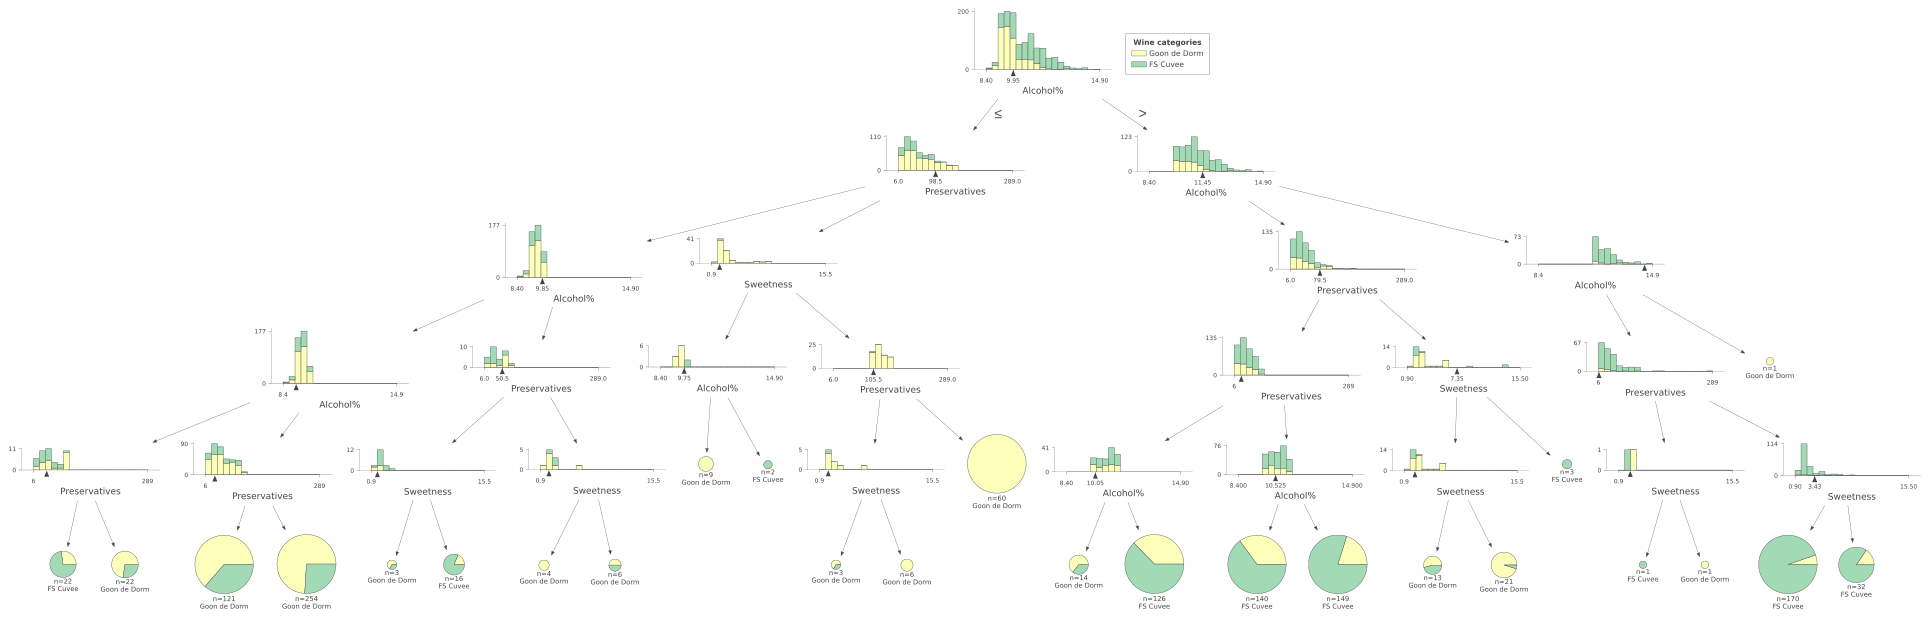

In [12]:
viz = dtreeviz.model(winemodel2,
            train_x,
            train_y,
            feature_names = train_x.columns,
            target_name = 'Wine categories',
            class_names = ['Goon de Dorm', 'FS Cuvee'])
viz.view()

### <font color='Green'> What does the prediction look like? </font>

In [13]:
actual_output=pd.concat((val_x,val_y,
                        pd.DataFrame(val_predictions2,index = val_x.index.copy(),columns=['Predicted']),
                        pd.DataFrame(winemodel2.predict_proba(val_x),index = val_x.index.copy(),columns=['a','Score']).drop(['a'],axis=1)
                        ),axis=1)

actual_output['Quality'] = np.where(actual_output['Quality']==1 , '1|🍷','0|💩') 
actual_output['Predicted'] = np.where(actual_output['Predicted']==1 , '1|🍷','0|💩') 
actual_output['Prediction Correct?']= np.where(actual_output['Quality']==actual_output['Predicted'],"✔️","❌")


actual_output= actual_output[features+['Score', 'Predicted','Quality','Prediction Correct?']]

actual_output.head(60)

Sweetness  Preservatives  Alcohol%     Score Predicted Quality  \
912         2.9            8.0     12.20  0.947059       1|🍷     1|🍷   
772         2.3          144.0      9.40  0.000000       0|💩     0|💩   
1037        1.8           56.0      9.20  0.259843       0|💩     0|💩   
1106        1.9           17.0     12.30  0.947059       1|🍷     1|🍷   
263         1.8           49.0      9.30  0.259843       0|💩     0|💩   
1029        1.8           18.0     10.50  0.626984       1|🍷     1|🍷   
935         2.3           72.0     11.80  0.947059       1|🍷     1|🍷   
1280        1.9           54.0     10.40  0.650000       1|🍷     1|🍷   
31          2.5           37.0     10.60  0.798658       1|🍷     1|🍷   
512         2.1           49.0      9.70  0.259843       0|💩     1|🍷   
61          1.8          112.0      9.30  0.000000       0|💩     0|💩   
278         6.4           13.0     12.60  0.843750       1|🍷     1|🍷   
233         2.6           37.0     11.00  0.798658       1|🍷     0|💩   
569         2.2           42.0     11.70  0.947059       1|🍷     1|🍷   
798         3.6           14.0     10.70  0.626984       1|🍷     1|🍷   
449         2.8           35.0     10.80  0.798658       1|🍷     1|🍷   
235         1.9           38.0      9.00  0.727273       1|🍷     1|🍷   
1323        1.8           55.0     11.00  0.798658       1|🍷     1|🍷   
973         1.7           12.0     10.70  0.626984       1|🍷     0|💩   
50          1.7           23.0      9.20  0.363636       0|💩     0|💩   
813         2.1            7.0     11.40  0.626984       1|🍷     0|💩   
229         2.6           37.0     11.00  0.798658       1|🍷     0|💩   
903         6.0           18.0     10.80  0.626984       1|🍷     1|🍷   
1420        1.6           19.0      9.80  0.363636       0|💩     0|💩   
1593        1.9           38.0      9.50  0.259843       0|💩     1|🍷   
1535        2.2           35.0      9.70  0.259843       0|💩     1|🍷   
1088        1.5           41.0      9.90  0.333333       0|💩     1|🍷   
1161        1.4           21.0     10.20  0.626984       1|🍷     1|🍷   
499         3.0           81.0     11.60  0.947059       1|🍷     1|🍷   
42          2.6           14.0     10.50  0.626984       1|🍷     1|🍷   
1183        1.6           61.0      9.30  0.259843       0|💩     0|💩   
1010        1.7           12.0     12.30  0.947059       1|🍷     1|🍷   
722         2.7           48.0     10.00  0.650000       1|🍷     0|💩   
1309        1.4           63.0      9.20  0.259843       0|💩     0|💩   
838         1.6           28.0     11.20  0.798658       1|🍷     1|🍷   
587         1.9          102.0      9.30  0.000000       0|💩     0|💩   
1040        2.2           32.0     10.20  0.650000       1|🍷     0|💩   
1126        1.7           11.0     13.50  0.947059       1|🍷     1|🍷   
1071        8.1           92.0      9.20  0.259843       0|💩     0|💩   
715         2.7           34.0      9.20  0.259843       0|💩     1|🍷   
646         3.6           20.0     10.10  0.626984       1|🍷     0|💩   
1575        2.2           20.0     11.80  0.947059       1|🍷     1|🍷   
1109        2.1           66.0     10.80  0.798658       1|🍷     1|🍷   
756         2.0           33.0     11.20  0.798658       1|🍷     1|🍷   
1396        1.6           11.0      9.55  0.363636       0|💩     0|💩   
735         2.1           22.0      9.50  0.363636       0|💩     0|💩   
1320        2.6           88.0     10.10  0.047619       0|💩     0|💩   
167         1.6           42.0      9.00  0.272727       0|💩     0|💩   
1142        2.4           12.0     11.40  0.626984       1|🍷     1|🍷   
644         2.3           40.0      9.40  0.259843       0|💩     0|💩   
196         2.4           55.0     10.20  0.650000       1|🍷     0|💩   
1120        2.5           17.0     13.10  0.947059       1|🍷     1|🍷   
1505        1.8           12.0      9.95  0.812500       1|🍷     0|💩   
1157        2.1          101.0     12.90  0.947059       1|🍷     1|🍷   
261         2.0           67.0      9.40  0.25

### Model 3 - Every Feature

In [14]:
# Run every feature through
y2=wine['Quality']
x2=wine.drop(['Quality'],axis=1)

train_x2, val_x2, train_y2, val_y2 = train_test_split(x2, y2, random_state = rand_seed)

winemodel3 = DecisionTreeClassifier(random_state=rand_seed, max_depth = 10)
winemodel3.fit(train_x2, train_y2)

val_predictions3=winemodel3.predict(val_x2)

model3_acc=round(accuracy_score(val_y2, val_predictions3)*100,2)
model3_f1=round(f1_score(val_y2, val_predictions3)*100,2)

print('Model 1 Accuracy=',model1_acc,'%')
print('Model 2 Accuracy=',model2_acc,'%')
print('Model 3 Accuracy=',model3_acc,'%')

Model 1 Accuracy= 65.5 %
Model 2 Accuracy= 66.25 %
Model 3 Accuracy= 71.75 %


#### Big Tree..... Keep Scrolling

In [15]:
## Visualise tree
viz = dtreeviz.model(winemodel3,
            train_x2,
            train_y2,
            feature_names = train_x2.columns,
            target_name = 'Wine categories',
            class_names = ['Goon de dorm', 'FS Cuvee'])
viz.view()

/home/michaeca/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


### Model 4 - Random Forests
<img src='forest.jpg'>

As your intuition may suggest - a random forest is a collection of decision trees. Just like a real forest is a collection of real trees - green and of all shapes and sizes!

This makes random forests more stable than individual trees as the output of the collective (<b>ensemble</b>) model is the output of all tree "votes"

In [16]:
# Run every feature through random tree
#n_estimators is the number of trees in the forest!
winemodel4 = RandomForestClassifier(random_state=rand_seed, n_estimators = 250) 
winemodel4.fit(train_x2, train_y2)

winemodel4.predict(val_x2)

val_predictions4=winemodel4.predict(val_x2)

model4_acc=round(accuracy_score(val_y2, val_predictions4)*100,2)
model4_f1=round(f1_score(val_y2, val_predictions4)*100,2)

print('Model 1 Accuracy=',model1_acc,'%')
print('Model 2 Accuracy=',model2_acc,'%')
print('Model 3 Accuracy=',model3_acc,'%')
print('Model 4 Accuracy=',model4_acc,'%')

Model 1 Accuracy= 65.5 %
Model 2 Accuracy= 66.25 %
Model 3 Accuracy= 71.75 %
Model 4 Accuracy= 75.25 %


### <font color ='blue'>Audience Participation</font>

Quite a significant improvement of accuracy of our model
We can try optimising the model by <br>
* `Feature engineer` existing ones - can you think of an example?
* Bringing `new features`: for example region/coordinates, colour, grape variety
* `Tuning` the parameters of the model (called hyperparamaters in technical parlance) - the number and depth of trees, split rules etc
* Call in `experts`




### How do the models compare? 

In [27]:
## Accuracy vs F1

AccVsF1=pd.DataFrame(
    [
        ['No Model','Blind Guess/Coin Toss',50,0],
        ['Model 1','Single Feature, Small Tree',model1_acc,model1_acc-50],
        ['Model 2','Selected Features',model2_acc,model2_acc-model1_acc],
        ['Model 3','All Features',model3_acc,model3_acc-model2_acc],
        ['Model 4','Random Forest',model4_acc,model4_acc-model3_acc]
        
    ],
    columns=['Model','Description','Accuracy%','Improvement'])

AccVsF1.head()

Model                 Description  Accuracy%  Improvement
0  No Model       Blind Guess/Coin Toss      50.00         0.00
1   Model 1  Single Feature, Small Tree      65.50        15.50
2   Model 2           Selected Features      66.25         0.75
3   Model 3                All Features      71.75         5.50
4   Model 4               Random Forest      75.25         3.50

### Confusion Matrix

Model 2 Accuracy= 66.25 %


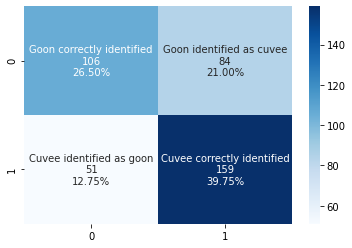

In [19]:
print('Model 2 Accuracy=',model2_acc,'%')

cm1 = confusion_matrix(val_y, val_predictions2)
group_names = ['Goon correctly identified',
               'Goon identified as cuvee',
               'Cuvee identified as goon',
               'Cuvee correctly identified']

group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')